
# **Battery revenue optimization with adiabatic quantum computation**
solved by khadija ech-challaouy 

In [1]:
%env QXToken= 8dd999e95ac3bad97a1bac28ad12371a92b292b5101d714cc24f61c0a7ce6cbf4c5379ef096dc86ad840c13679de895ccd271e4e6afadb0f600d6e0e4ab3218d
%env QC_GRADING_ENDPOINT= https://qac-grading.quantum-computing.ibm.com
%env QXAuthURL = https://auth.quantum-computing.ibm.com/api

env: QXToken=8dd999e95ac3bad97a1bac28ad12371a92b292b5101d714cc24f61c0a7ce6cbf4c5379ef096dc86ad840c13679de895ccd271e4e6afadb0f600d6e0e4ab3218d
env: QC_GRADING_ENDPOINT=https://qac-grading.quantum-computing.ibm.com
env: QXAuthURL=https://auth.quantum-computing.ibm.com/api


# **Content**

* [I- A brief introduction to quantum computing](#intro)
* [II- Adiabatic quantum computation](#adiabatic_computation)
* [III-Battery revenue optimization problem](#problem)
* [IV-Solving the Relaxed Battery Revenue Optimization Problem Step by Step](#step_by_step)

<a id="intro"></a>
## ***I- A brief introduction to quantum computing:***

### **1- Qubit**

In most models of quantum circuit computing (including IBM's), the smallest unit of information is a two-level quantum system, called a *qubit*. The state $\left|\Psi\right\rangle$ of a qubit lives in a two-dimensional Hilbert space $\mathcal{H}_2$. We can define a basis of this Hilbert space, consisting of two orthogonal states. Let's call them $\left|0\right\rangle$ and $\left|1\right\rangle$ in analogy to classical bits. The state of the qubit can then be described (in that basis) as a linear combination of the basis states: $\left|\Psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$, where $\alpha, \beta$ are complex numbers and $\sqrt{|\alpha|^2+|\beta|^2} = 1$. We can now describe the state by the two-dimensional column vector

\begin{equation*}
\left|\Psi\right\rangle = \left[
\begin{array}{l} \alpha \\ \beta \end{array}
\right] = e^{i\phi_0}\left[
\begin{array}{l} \cos(\theta/2) \\ e^{i\phi}\sin(\theta/2) \end{array}
\right],
\end{equation*}

where I have rewritten $\alpha,\beta$ in terms of their global phase $\phi_0$, relative phase $\phi$ and their magnitudes $|\alpha| = \cos(\theta/2)$, $|\beta| = \sin(\theta/2)$. As the global phase doesn't have any physical effect on a measurement, we can discard it and we are left with a description of the state using two real angles, $\phi$ and $\theta$. This representation allows us to visualize the state as a point on the unit sphere, the so-called Bloch sphere.

Let's visualize the state $\left|+\right\rangle = \frac{1}{\sqrt{2}}\left[\begin{array}{l} 1 \\ 1 \end{array}\right] = \left[\begin{array}{l}\cos(\pi/4) \\ \sin(\pi/4)\end{array}\right]$

first let's import the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_bloch_multivector, plot_state_qsphere
import warnings
warnings.filterwarnings("ignore")

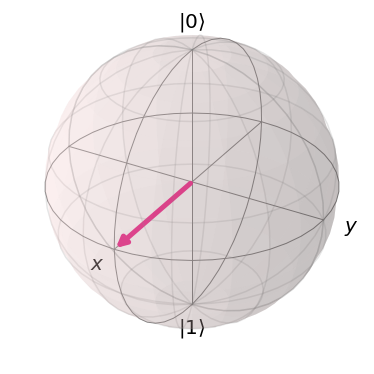

In [2]:
plot_bloch_vector([1, np.pi/2, 0], coord_type='spherical')

To perform computation on a qubit, we need a way to modify its state. This is what (single qubit) gates do. The action of a gate on a single qubit can be described by a 2x2 unitary matrix $U$ and the resulting state can be obtained by matrix multiplication $\left|U\Psi\right\rangle = U\left|\Psi\right\rangle$.

Let's for example take the Pauli-X gate, represented by $X = \left[ \begin{array}{lr} 0 & 1 \\ 1 & 0 \end{array} \right]$. It's action on a state, $\left|X\Psi\right\rangle = X\left|\Psi\right\rangle = \left[ \begin{array}{lr} 0 & 1 \\ 1 & 0 \end{array} \right] \left[ \begin{array}{l} \alpha \\ \beta \end{array} \right] = \left[ \begin{array}{l} \beta \\ \alpha \end{array} \right]$, is to exchange the components of the state vector. The state $\left|0\right\rangle$ becomes $\left|1\right\rangle$ and the state $\left|1\right\rangle$ becomes $\left|0\right\rangle$.

Finally, once we have performed computation on the qubit state, we need to transfer the information to a form that the classical computer understands, to a classical bit. This is done by performing a measurement of the qubit state. The outcome of the measurement will be one of the basis states, namely $\left|0\right\rangle$ with a probability $\left|\left\langle0\right|\left.\Psi\right\rangle\right|^2 = |\alpha|^2$ and $\left|1\right\rangle$ with a probability $\left|\left\langle1\right|\left.\Psi\right\rangle\right|^2 = |\beta|^2$.

### **2- Multi-qubit register**

As in a classical computer, we can not do much with just a single qbit. So let us now consider multiple qubits and combine them into a quantum register. The state of a N-qubit register now lives in the $2^N$-dimensional Hilbert space resulting from the tensor product $\mathcal{H} = \otimes_{i=1}^N \mathcal{H}_2 = \mathcal{H}_2 \otimes \mathcal{H}_2 \otimes ... \otimes \mathcal{H}_2$ of the single qubit Hilbert space $\mathcal{H}_2$ and we now need $2^N$ basis states to describe it. For a two qubit register, we can construct a basis with the four states $\left| 00 \right\rangle$, $\left| 01 \right\rangle$, $\left| 10 \right\rangle$, $\left| 11 \right\rangle$ and describe the register state in that basis with a vector
\begin{equation*}
\left| \Psi \right\rangle = \left[ \begin{array}{l} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{array} \right]
\end{equation*}

We can construct register states from the single qubit states by taking their tensor product:
\begin{equation*}
\left| ab \right\rangle = \left| a \right\rangle \otimes \left| b \right\rangle = \left[ \begin{array}{l} a_0b_0 \\ a_0 b_1 \\ a_1b_0 \\ a_1b_1 \end{array} \right]
\end{equation*}
But what about the two-qubit state
\begin{equation*}
\frac{1}{\sqrt{2}}\left( \left|00\right\rangle + \left|11\right\rangle \right) = \frac{1}{\sqrt{2}}\left[ \begin{array}{l} 1 \\ 0 \\ 0 \\ 1 \end{array} \right]\text{ ?}
\end{equation*}
It's a perfectly valid two-qubit state, but we can't construct it as a tensor product of single qubit states (try it)! We call it an entangled state.

As in the single qubit case, multi-qubit gates can be represented by unitary matrices and operate on a register state by matrix multiplication. An N-qubit gate is then represented by a $2^N \times 2^N$ unitary matrix.

Finally, measurement works in the same way as for single qubits: When we measure the two-qubit state $\left| \Psi \right\rangle$ in the basis given above, we will find it in one of the basis states $\left|ij\right\rangle$ with a probability $\left|\left\langle ij \right|\left.\Psi\right\rangle\right|^2 = |a_{ij}|^2$.

<a id="adiabatic_computation"></a>
## ***II- Adiabatic quantum computation:***

An **adiabatic process** - a process that does not involve the transfer of heat and matter in or out of the thermodynamic system.In adiabatic process, energy is transferred to the surroundings only as work [**[1]**] 

Adiabatic Quantum Computation (AQC) is a different model of quantum computation. It is based on the adiabatic approximation [**[1]**](https://arxiv.org/abs/1611.04471):

> For a system initially prepared in an eigenstate (e.g., the ground state) $\left|\epsilon_0(0)\right\rangle$ of a time-dependent Hamiltonian $H(t)$, the time evolution governed by the Schrödinger equation $i\frac{\partial\left|\psi(t)\right\rangle}{\partial t} = H(t)\left|\psi(t)\right\rangle$ (we set $\hbar=1$ from now on) will approximately keep the actual state $\left|\psi(t)\right\rangle$ of the system in the corresponding instantaneous ground state (or other eigenstate) $\left|\epsilon_0(t)\right\rangle$ of $H(t)$, provided that $H(t)$ varies “sufficiently slowly”.

Many optimization problems can be translated into a form suitable for AQC. The basic idea is to construct a Hamiltonian $H_f$, whose ground state encodes the solution of the optimization problem. The quantum system is then initialized in the ground state of a simple Hamiltonian $H_0$ and let to evolve adiabatically under a time dependent Hamiltonian $H(t)$, such that $H(0) = H_0$ and $H(t_f) = H_f$. At time $t_f$, the system is in the ground state of Hamiltonian $H_f$, which encodes the solution of the optimization problem.

One way to construct the time dependent Hamiltonian $H(t)$ is by interpolation of the initial ($H_0$) and final ($H_f$) Hamiltonians:
\begin{equation*}
H(t) = \beta(t)H_0 + \gamma(t) H_f,
\end{equation*}
where $\beta(t)$ and $\gamma(t)$ are monotonically decreasing and increasing, respectively, and $\beta(0)=1$, $\beta(t_f)=0$, $\gamma(0)=0$, $\gamma(t_f)=1$.


### **1-Example**
Let's see an example: We want to find the solution to the optimization problem
\begin{equation*}
    \min_{x\in\mathcal{X}} f(x), \text{ with }\mathcal{X} = [0, 1, ..., 2^N-1].
\end{equation*}
We construct the Hamiltonian $H_f$, such that $H_f\left|x\right\rangle = f(x)\left|x\right\rangle$, where $\left|x\right\rangle$ is an encoding of $x\in\mathcal{X}$. We define $H_0 = \mathbb{1} - \left|\phi\right\rangle\left\langle\phi\right|$, where $\left|\phi\right\rangle = \frac{1}{\sqrt{N}}\sum_{i=0}^{N-1}\left|i\right\rangle$ is the uniform superposition state.

We initialize the state $\left|\psi\right\rangle$ in the ground state of Hamiltonian $H_0$: $\left|\psi(0)\right\rangle = \left|\phi\right\rangle$ and let it evolve under the time dependent Hamiltonian $H(t) = (1-t/t_f) H_0 + t/t_f H_f$ (assuming the evolution satisfies the adiabatic theorem and is "sufficiently slow"). At time $t_f$, $\left|\psi(t_f)\right\rangle$ is in the ground state of the Hamiltonian $H(t_f) = H_f$ and therefore satisfies
\begin{equation*}
H_f \left|\psi(t_f)\right\rangle = \min_{x\in\mathcal{X}} f(x)\left|\psi(t_f)\right\rangle.
\end{equation*}
The final state $\left|\psi(t_f)\right\rangle$ encodes the solution to the optimization problem!

### **2-Connection to Circuit Model**

How can we translate the time evolution to our circuit model and solve the optimization problem using AQC on IBM's quantum computers? After all, we can't construct the time dependent Hamiltonian $H(t)$!

First, let's define $t_i = i \frac{t_f}{p}$ ($i\in[0,1,...,p]$), the discretization of the time window [0, t_f] into $p$ chunks. We can now approximate the time dependent Hamiltonian $H(t)$ by the (p+1) time independent Hamiltonians $H_i = H(t_i)$.

We can express the time evolution of a state $\left|\psi\right\rangle$ under a time independent Hamiltonian $H$ using the unitary time evolution operator $U_H(t) = \exp\left(-iHt\right)$:
\begin{equation*}
\left|\psi(t)\right\rangle = U_H(t)\left|\psi(0)\right\rangle = \exp\left(-iHt\right)\left|\psi(0)\right\rangle.
\end{equation*}

Assuming the Hamiltonian $H_i = H(t_i)$ changes "sufficiently slowly" to $H_{i+1} = H(t_{i+1})$, we can approximate the time evolution of the initial state $\left|\psi(0)\right\rangle$ to the final state $\left|\psi(t_f)\right\rangle$ under the Hamiltonian $H(t)$ as
\begin{equation*}
\left|\psi(t_f)\right\rangle \approx \Pi_{j=1}^p \exp\left(-iH_j (t_j-t_{j-1})\right) \left|\psi(0)\right\rangle = \Pi_{j=1}^p \exp\left(-iH_j \frac{t_f}{p}\right) \left|\psi(0)\right\rangle.
\end{equation*}
If $\left|\psi(0)\right\rangle$ is the ground state of the initial Hamiltonian $H(0)$, then $\left|\psi(t_f)\right\rangle$ is the ground state of the final Hamiltonian $H_f$.


Taking the interpolating time dependent Hamiltonian from above, we get:
\begin{equation*}
\left|\psi(t_f)\right\rangle \approx \Pi_{j=1}^p \exp\left( -i[\beta(t_j)H_0 + \gamma(t_j)H_f] \frac{t_f}{p} \right) \left|\psi(0)\right\rangle
\end{equation*}

Let's rename $H_0 \equiv B$ and $H_f \equiv C$ and define $\beta(t_i) = \frac{p}{t_f}\beta_i$, with $\beta_i = 1-i/p$ and $\gamma(t_i) = \frac{p}{t_f}\gamma_i$, with $\gamma_i = i/p$ ($i\in[1,...,p]$). The above equation becomes
\begin{equation*}
\left|\psi(t_f)\right\rangle \approx \Pi_{j=1}^p \exp\left( -i[\beta_j B + \gamma_j C] \right) \left|\psi(0)\right\rangle = U(B, \beta_p)U(C, \gamma_p)...U(B, \beta_1)U(C, \gamma_1)\left|\psi(0)\right\rangle,
\end{equation*}
where $U(B, \beta) \equiv \exp(-i\beta B)$ and $U(C, \gamma) \equiv \exp(-i\gamma C)$.

We have brought the AQC time evolution operator into a form suitable for the circuit model! Note that $U$, $B$ and $C$ are time independent unitary operators and $\left|\psi(0)\right\rangle$ is the ground state of $B$. One simple choice for the operator $B$ is $B = (\sigma_x)^{\otimes N}$, the tensor product of the Pauli X operator. Depending on the type of optimization problem we want to solve, we can choose $\left|\psi(0)\right\rangle = \left|-\right\rangle^{\otimes N}$ or $\left|\psi(0)\right\rangle = \left|+\right\rangle^{\otimes N}$, the eigenstates of $B$ with the lowest and highest eigenvalue, respectively. In other words the first choice is useful for minimization problems, while the second choice can be used for maximization.

<a id="problem"></a>
## **III-Battery revenue optimization problem**

Battery storage systems have provided a solution to flexibly integrate large-scale renewable energy (such as wind and solar) in a power system. The revenues from batteries come from different types of services sold to the grid. The process of energy trading of battery storage assets is as follows: A regulator asks each battery supplier to choose a market in advance for each time window. Then, the batteries operator will charge the battery with renewable energy and release the energy to the grid depending on pre-agreed contracts. The supplier makes therefore forecasts on the return and the number of charge/discharge cycles for each time window to optimize its overall return. 

How to maximize the revenue of battery-based energy storage is a concern of all battery storage investors. Choose to let the battery always supply power to the market which pays the most for every time window might be a simple guess, but in reality, we have to consider many other factors. 

What we can not ignore is the aging of batteries, also known as **degradation**. As the battery charge/discharge cycle progresses, the battery capacity will gradually degrade (the amount of energy a battery can store, or the amount of power it can deliver will permanently reduce). After a number of cycles, the battery will reach the end of its usefulness. Since the performance of a battery decreases while it is used, choosing the best cash return for every time window one after the other, without considering the degradation, does not lead to an optimal return over the lifetime of the battery, i.e. before the number of charge/discharge cycles reached.

Therefore, in order to optimize the revenue of the battery, what we have to do is to select the market for the battery in each time window taking both **the returns on these markets (value)**, based on price forecast, as well as expected battery **degradation over time (cost)** into account ——It sounds like solving a common optimization problem, right?

We will investigate how quantum optimization algorithms could be adapted to tackle this problem.


<div>
<p></p>
<center><img src="resources/renewable-g7ac5bd48e_640.jpg" width="600"></center>

</div>

Image source: [pixabay](https://pixabay.com/photos/renewable-energy-environment-wind-1989416/)

### ***Problem Setting***

Here, we have referred to the problem setting in de la Grand'rive and Hullo's paper [**[2]**](https://arxiv.org/abs/1908.02210).

Considering two markets $M_{1}$ , $M_{2}$, during every time window (typically a day), the battery operates on one or the other market, for a maximum of $n$ time windows. Every day is considered independent and the intraday optimization is a standalone problem: every morning the battery starts with the same level of power so that we don’t consider charging problems. Forecasts on both markets being available for the $n$ time windows, we assume known for each time window $t$ (day) and for each market:

- the daily returns $\lambda_{1}^{t}$ , $\lambda_{2}^{t}$

- the daily degradation, or health cost (number of cycles), for the battery $c_{1}^{t}$, $c_{2}^{t}$ 

We want to find the optimal schedule, i.e. optimize the life time return with a cost less than $C_{max}$ cycles. We introduce $d = max_{t}\left\{c_{1}^{t}, c_{2}^{t}\right\} $.

We introduce the decision variable $z_{t}, \forall t \in [1, n]$ such that $z_{t} = 0$ if the supplier chooses $M_{1}$ , $z_{t} = 1$ if choose $M_{2}$, with every possible vector $z = [z_{1}, ..., z_{n}]$ being a possible schedule. The previously formulated problem can then be expressed as:


\begin{equation}
\underset{z \in \left\{0,1\right\}^{n}}{max} \displaystyle\sum_{t=1}^{n}(1-z_{t})\lambda_{1}^{t}+z_{t}\lambda_{2}^{t}
\end{equation}
<br>
\begin{equation}
    s.t. \sum_{t=1}^{n}[(1-z_{t})c_{1}^{t}+z_{t}c_{2}^{t}]\leq C_{max}
\end{equation}

We will optimize the battery schedule using the adiabatic quantum computation to maximize the total return with a cost within $C_{max}$ under the following conditions;
<br>
- the time window $t = 11$<br>
- the daily return $\lambda_{1} = [3, 7, 3, 4, 2, 6, 2, 2, 4, 6, 6]$<br>
- the daily return $\lambda_{2} = [7, 8, 7, 6, 6, 9, 6, 7, 6, 7, 7]$<br>
- the daily degradation for the battery $c_{1} = [2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2]$<br>
- the daily degradation for the battery $c_{2} = [4, 3, 3, 4, 4, 5, 3, 4, 4, 3, 4]$<br>
- $C_{max} = 33$<br>
    - **Note:** $\lambda_{1}[i] < \lambda_{2}[i]$ and $c_{1}[i] < c_{2}[i]$ holds for $i \in \{1,2,...,t\}$
<br>
    

Let "0" denote the choice of market $M_{1}$ and "1" denote the choice of market $M_{2}$, the optimal solutions are "00111111000", and "10110111000" with return value $67$ and cost $33$.

### ***Formulating the relaxed knapsack problem***

Here we are making the answer according to the way shown in [**[2]**](https://arxiv.org/abs/1908.02210), which is solving the "relaxed" formulation of knapsack problem.
The relaxed problem can be defined as follows:
\begin{equation*}
\text{maximize } f(z)=return(z)+penalty(z)
\end{equation*}

\begin{equation*}
\text{where} \quad return(z)=\sum_{t=1}^{n} return_{t}(z) \quad \text{with} \quad return_{t}(z) \equiv\left(1-z_{t}\right) \lambda_{1}^{t}+z_{t} \lambda_{2}^{t}
\end{equation*}

\begin{equation*}
\quad \quad \quad \quad \quad \quad penalty(z)=\left\{\begin{array}{ll}
0 & \text{if}\quad  cost(z)<C_{\max } \\
-\alpha\left(cost(z)-C_{\max }\right) & \text{if} \quad cost(z) \geq C_{\max }, \alpha>0 \quad \text{constant}
\end{array}\right.
\end{equation*}

Now, our task is to find an operator C, such that
\begin{equation*}
C\left|z\right\rangle = f(z)\left|z\right\rangle.
\end{equation*}
Applying the AQC procedure introduced earlier, we should find an approximate solution to the relaxed battery optimization problem.

<a id="step_by_step"></a>
## **IV-Solving the Relaxed Battery Revenue Optimization Problem Step by Step**

The basic unit of relaxed approach consisits of the following items.
1. Phase Operator $U(C, \gamma_i)$
    1. return part
    2. penalty part
        1. Cost calculation (data encoding)
        2. Constraint testing (marking the indices whose data exceed $C_{max}$)
        3. Penalty dephasing (adding penalty to the marked indices)
        4. Reinitialization of constraint testing and cost calculation (clean the data register and flag register)
2. Mixing Operator $U(B, \beta_i)$

This procedure unit $U(B, \beta_i)U(C, \gamma_i)$ will be totally repeated $p$ times in the whole relaxed QAOA procedure.
<br>
Let's take a look at each function one by one.

The quantum circuit we are going to make consists of three types of registers: index register, data register, and flag register.
Index register and data register are used for QRAM which contain the cost data for every possible choice of battery.
Here these registers appear in the function templates named as follows:
- `qr_index`: a quantum register representing the index (the choice of 0 or 1 in each time window)
- `qr_data`: a quantum register representing the total cost associated with each index
- `qr_f`: a quantum register that store the flag for penalty dephasing
<br>

We also use the following variables to represent the number of qubits in each register.
- `index_qubits`: the number of qubits in `qr_index`
- `data_qubits`: the number of qubits in `qr_data`

<div class="alert alert-block alert-success">

**Step 1**
    
</div>

## Phase Operator $U(C, \gamma_i)$
### Return Part
The return part $return (z)$ can be transformed as follows:

\begin{equation*}
\begin{aligned}
e^{-i \gamma_i . return(z)}\left|z\right\rangle 
&=\prod_{t=1}^{n} e^{-i \gamma_i return_{t}(z)}\left|z\right\rangle \\
&=e^{i \theta} \bigotimes_{t=1}^{n} e^{-i \gamma_i z_{t}\left(\lambda_{2}^{t}-\lambda_{1}^{t}\right)}\left|z_{t}\right\rangle \\
\text{with}\quad \theta &=\sum_{t=1}^{n} \lambda_{1}^{t}\quad \text{constant}
\end{aligned}
\end{equation*}

Since we can ignore the constant phase rotation, the return part $return (z)$ can be realized by rotation gate $U_1\left(\gamma_i \left(\lambda_{2}^{t}-\lambda_{1}^{t}\right)\right)= e^{-i \frac{\gamma_i \left(\lambda_{2}^{t}-\lambda_{1}^{t}\right)}  2}$ for each qubit.
<br>
<br>




In [3]:
instance_examples = [
    {
        'L1': [3, 7, 3, 4, 2, 6, 2, 2, 4, 6, 6],
        'L2': [7, 8, 7, 6, 6, 9, 6, 7, 6, 7, 7],
        'C1': [2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2],
        'C2': [4, 3, 3, 4, 4, 5, 3, 4, 4, 3, 4],
        'C_max': 33
    },
     {
        'L1': [4, 2, 2, 3, 5, 3, 6, 3, 8, 3, 2],
        'L2': [6, 5, 8, 5, 6, 6, 9, 7, 9, 5, 8],
        'C1': [3, 3, 2, 3, 4, 2, 2, 3, 4, 2, 2],
        'C2': [4, 4, 3, 5, 5, 3, 4, 5, 5, 3, 5],
        'C_max': 38
    },
    {
        'L1': [5, 4, 3, 3, 3, 7, 6, 4, 3, 5, 3],
        'L2': [9, 7, 5, 5, 7, 8, 8, 7, 5, 7, 9],
        'C1': [2, 2, 4, 2, 3, 4, 2, 2, 2, 2, 2],
        'C2': [3, 4, 5, 4, 4, 5, 3, 3, 5, 3, 5],
        'C_max': 35
    }
]

In [4]:
from typing import List, Union
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble
from qiskit.compiler import transpile
from qiskit.circuit import Gate
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit.library import QFT

In [5]:
def phase_return(index_qubits: int, gamma: float, L1: list, L2: list, to_gate=True) -> Union[Gate, QuantumCircuit]:
    qr_index = QuantumRegister(index_qubits, "index")
    qc = QuantumCircuit(qr_index)

    ##############################
    ### U_1(gamma * (lambda2 - lambda1)) for each qubit ###
    

    for i in range(index_qubits):
        angle = -1*gamma*(L2[i] - L1[i])
        qc.p(angle,qr_index[i])

    ##############################


## Phase Operator $U(C, \gamma_i)$
### Penalty Part

In this part, we are considering how to add penalty to the quantum states in index register whose total cost exceed the constraint $C_{max}$.

As shown above, this can be realized by the following four steps.

1. Cost calculation (data encoding)
2. Constraint testing (marking the indices whose data value exceed $C_{max}$)
3. Penalty dephasing (adding penalty to the marked indices)
4. Reinitialization of constraint testing and cost calculation (clean the data register and flag register)

<div class="alert alert-block alert-success">

**Step 2**
    
</div>

#### Cost calculation (data encoding)

To represent the sum of cost for every choice of answer, we can use QRAM structure.
In order to implement QRAM by quantum circuit, the addition function would be helpful.
Here we will first prepare a function for constant value addition.
<br>
<br>
To add a constant value to data we can use
- Series of full adders
- Plain adder network [**[3]**](https://arxiv.org/abs/quant-ph/9511018)
- Ripple carry adder [**[4]**](https://arxiv.org/abs/quant-ph/0410184)
- QFT adder **[[5](https://arxiv.org/abs/quant-ph/0008033), [6](https://arxiv.org/abs/1411.5949)]**
- etc...
<br>

Each adder has its own characteristics. Here, for example, we will briefly explain how to implement QFT adder, which is less likely increase circuits cost when the number of additions increases.
1. QFT on the target quantum register
2. Local phase rotation on the target quantum register controlled by quantum register for the constant
3. IQFT on the target quantum register
<br>
<br>



In [6]:
def subroutine_add_const(data_qubits: int, const: int, to_gate=True) -> Union[Gate, QuantumCircuit]:
    qc = QuantumCircuit(data_qubits)
    
    ### Phase Rotation ###

    for i in range(data_qubits):
        angle = const*np.pi/(2**i)
        qc.p(angle,data_qubits-i-1)

    
    return qc.to_gate(label=" [+"+str(const)+"] ") if to_gate else qc

In [7]:
def custom_qft(data_qubits):
    qr_data = QuantumRegister(data_qubits)
    qc = QuantumCircuit(qr_data)
    i = data_qubits
    while i>=0:
        n = i - 1
        qc.h(qr_data[n]) 
        for qubit in range(n):
            qc.cp(np.pi/2**(n-qubit), qr_data[qubit], qr_data[n])
        i = i-1
    qc.h(qr_data[data_qubits-1])
    for i in range(data_qubits//2):
        qc.swap(qr_data[i], qr_data[data_qubits-i-1])
    
    return qc


def const_adder(data_qubits: int, const: int, to_gate=True) -> Union[Gate, QuantumCircuit]:
    
    qr_data = QuantumRegister(data_qubits, "data")
    qc = QuantumCircuit(qr_data)
  
    ### QFT ###
    
    qft_gate = custom_qft(data_qubits).to_gate()
    qc.append(qft_gate,qr_data[:])
    
    ### Phase Rotation ###
    # Useing `subroutine_add_const`
    add_gate = subroutine_add_const(data_qubits,const)
    qc.append(add_gate,qr_data[:])
    
    ### IQFT ###
    
    inverse_qft_gate = custom_qft(data_qubits).inverse().to_gate()
    qc.append(inverse_qft_gate,qr_data[:])
    
    return qc.to_gate(label=" [ +" + str(const) + "] ") if to_gate else qc

<div class="alert alert-block alert-success">

**Step 3**
    
</div>

Here we want to store the cost in a QRAM form: 

\begin{equation*}
\sum_{x\in\{0,1\}^t} \left|x\right\rangle\left|cost(x)\right\rangle
\end{equation*}

where $t$ is the number of time window (=size of index register), and $x$ is the pattern of battery choice through all the time window.

Given two lists $C^1 = \left[c_0^1, c_1^1, \cdots\right]$ and $C^2 = \left[c_0^2, c_1^2, \cdots\right]$, 
we can encode the "total sum of each choice" of these data using controlled gates by each index qubit.
If we want to add $c_i^1$ to the data whose $i$-th index qubit is $0$ and $c_i^2$ to the data whose $i$-th index qubit is $1$, 
then we can add $C_i^1$ to data register when the $i$-th qubit in index register is $0$,
and $C_i^2$ to data register when the $i$-th qubit in index register is $1$.
These operation can be realized by controlled gates.
 to create controlled gate from gate with type `qiskit.circuit.Gate`, the `control()` method might be useful.
<br>
<br>



In [9]:
def cost_calculation(index_qubits: int, data_qubits: int, list1: list, list2: list, to_gate = True) -> Union[Gate, QuantumCircuit]:
    
    qr_index = QuantumRegister(index_qubits, "index")
    qr_data = QuantumRegister(data_qubits, "data")
    qc = QuantumCircuit(qr_index, qr_data)

    for i, (val1, val2) in enumerate(zip(list1, list2)):
        
        ### Adding val2 using const_adder controlled by i-th index register (set to 1) ###
        
        gate1 = const_adder(data_qubits, val2).control(1)
        
        temp_list = []
        temp_list.append(qr_index[i])
        for j in range(len(qr_data)):
            temp_list.append(qr_data[j])
            
        qc.append(gate1,temp_list)
        
        ##############################
        qc.x(qr_index[i])
        
        ### Adding val1 using const_adder controlled by i-th index register (set to 0) ###
   
        
        gate2 = const_adder(data_qubits, val1).control(1)
        qc.append(gate2,temp_list)
        
        ##############################
        qc.x(qr_index[i])
    
    return qc.to_gate(label=" Cost Calculation ") if to_gate else qc

<div class="alert alert-block alert-success">

**Step 4**
    
</div>

#### Constraint Testing

After the cost calculation process, we have gained the entangled QRAM with flag qubits set to zero for all indices:

\begin{equation*}
\sum_{x\in\{0,1\}^t} \left|x\right\rangle\left|cost(x)\right\rangle\left|0\right\rangle
\end{equation*}

In order to selectively add penalty to those indices with cost values larger than $C_{max}$, we have to prepare the following state:

\begin{equation*}
\sum_{x\in\{0,1\}^t} \left|x\right\rangle\left|cost(x)\right\rangle\left|cost(x)\geq C_{max}\right\rangle
\end{equation*}
<br>
<br>

.

In [10]:
def constraint_testing(data_qubits: int, C_max: int, to_gate = True) -> Union[Gate, QuantumCircuit]:

    qr_data = QuantumRegister(data_qubits, "data")
    qr_f = QuantumRegister(1, "flag")
    qc = QuantumCircuit(qr_data, qr_f)

    ##############################
    ### Setting the flag register for indices with costs larger than C_max ###
    

    # adding w-1 to qr_data
    if w > 1:
        qft = custom_qft(data_qubits).to_gate()
        qc.append(qft, qr_data[:])
        for i in range(data_qubits):
            angle = (w-1)*np.pi/(2**i)
            qc.p(angle,qr_data[data_qubits-i-1])
        iqft = custom_qft(data_qubits).inverse().to_gate()
        qc.append(iqft, qr_data[:])

    # checking cost-1 < c_max
    qc.x(qr_data[c:data_qubits])
    qc.mct(qr_data[c:data_qubits], qr_f[0])
    qc.x(qr_f[0])



    return qc.to_gate(label=" Constraint Testing ") if to_gate else qc

<div class="alert alert-block alert-success">

**Step 5**
    
</div>

#### Penalty Dephasing

We also have to add penalty to the indices with total costs larger than $C_{max}$ in the following way.

\begin{equation*}
\quad \quad \quad \quad \quad \quad penalty(z)=\left\{\begin{array}{ll}
0 & \text{if}\quad  cost(z)<C_{\max } \\
-\alpha\left(cost(z)-C_{\max }\right) & \text{if} \quad cost(z) \geq C_{\max }, \alpha>0 \quad \text{constant}
\end{array}\right.
\end{equation*}

This penalty can be described as quantum operator $e^{i \gamma \alpha\left(cost(z)-C_{\max }\right)}$.
<br>
To realize this unitary operator as quantum circuit, we focus on the following property.

\begin{equation*}
\alpha\left(cost(z)-C_{m a x}\right)=\sum_{j=0}^{k-1} 2^{j} \alpha A_{1}[j]-2^{c} \alpha
\end{equation*}

where $A_1$ is the quantum register for qram data, $A_1[j]$ is the $j$-th qubit of $A_1$, and $k$ and $c$ are appropriate constants.

Using this property, the penalty rotation part can be realized as rotation gates on each digit of data register of QRAM controlled by the flag register.
<br>
<br>



In [11]:
def penalty_dephasing(data_qubits: int, alpha: float, gamma: float, to_gate = True) -> Union[Gate, QuantumCircuit]:

    qr_data = QuantumRegister(data_qubits, "data")
    qr_f = QuantumRegister(1, "flag")
    qc = QuantumCircuit(qr_data, qr_f)

    ### Phase Rotation ###
  
    for i in range(data_qubits):
        angle = (2**i)*alpha*gamma
        qc.cp(angle, qr_f[0], qr_data[i])

    angle = -(2**c)*alpha*gamma
    qc.p(angle, qr_f[0])


    return qc.to_gate(label=" Penalty Dephasing ") if to_gate else qc

<div class="alert alert-block alert-success">

**Step 6**
    
</div>

#### Reinitialization

The ancillary qubits such as the data register and the flag register should be reinitialized to zero states when the operator $U(C, \gamma_i)$ finishes.
<br>
 to apply inverse unitary of a `qiskit.circuit.Gate`, the `inverse()` method might be useful.
<br>
<br>


In [12]:
def reinitialization(index_qubits: int, data_qubits: int, C1: list, C2: list, C_max: int, to_gate = True) -> Union[Gate, QuantumCircuit]:
    
    qr_index = QuantumRegister(index_qubits, "index")
    qr_data = QuantumRegister(data_qubits, "data")
    qr_f = QuantumRegister(1, "flag")
    qc = QuantumCircuit(qr_index, qr_data, qr_f)
    
    ### Reinitialization Circuit ###
    
    inverse_constraint_testing = constraint_testing(data_qubits,C_max).inverse()
    qc.append(inverse_constraint_testing,qr_data[:]+qr_f[:])
    
    inverse_cost = cost_calculation(index_qubits, data_qubits, C1, C2).inverse()
    qc.append(inverse_cost, qr_index[:]+qr_data[:])
    
    
    return qc.to_gate(label=" Reinitialization ") if to_gate else qc

<div class="alert alert-block alert-success">

**Step 7**
    
</div>

### Mixing Operator $U(B, \beta_i)$

Finally, we have to add the mixing operator $U(B,\beta_i)$ after phase operator $U(C,\gamma_i)$.
The mixing operator can be represented as follows.
\begin{equation*}
U(B, \beta_i)=\exp (-i \beta_i B)=\prod_{i=j}^{n} \exp \left(-i \beta_i \sigma_{j}^{x}\right)
\end{equation*}

This operator can be realized by $R_x(2\beta_i)$ gate on each qubits in index register.
<br>
<br>



In [13]:
def mixing_operator(index_qubits: int, beta: float, to_gate = True) -> Union[Gate, QuantumCircuit]:
    
    qr_index = QuantumRegister(index_qubits, "index")
    qc = QuantumCircuit(qr_index)
    
    ### Mixing Operator ###
    
    for i in range(index_qubits):
        qc.rx(2*beta, qr_index[i])
    
    return qc.to_gate(label=" Mixing Operator ") if to_gate else qc

<div class="alert alert-block alert-success">

**Step 8**
    
</div>

Finally, using the functions we have created above, we will make the `solver_function` for whole relaxed QAOA process.



In [14]:
def solver_function(L1: list, L2: list, C1: list, C2: list, C_max: int) -> QuantumCircuit:
    
    # the number of qubits representing answers
    index_qubits = len(L1)
    
    # the maximum possible total cost
    max_c = sum([max(l0, l1) for l0, l1 in zip(C1, C2)])
    
    # the number of qubits representing data values can be defined using the maximum possible total cost as follows:
    data_qubits = math.ceil(math.log(max_c, 2)) + 1 if not max_c & (max_c - 1) == 0 else math.ceil(math.log(max_c, 2)) + 2
    print('L:',L1,L2)
    print('C:',C1,C2)
    c = np.log2(C_max)
    diff = np.log2(C_max) - int(np.log2(C_max))
    w = 0
    if diff != 0:
        w = 2**(int(np.log2(C_max)) + 1) - C_max
        c = np.log2(C_max + w)
    c = int(c)
    print('C_max=:',C_max,'c:',c,'w:',w)
    ### Phase Operator ###
    # return part
    def phase_return(index_qubits: int, gamma: float, L1: list, L2: list, to_gate=True) -> Union[Gate, QuantumCircuit]:
        qr_index = QuantumRegister(index_qubits, "index")
        qc = QuantumCircuit(qr_index)
        ### U_1(gamma * (lambda2 - lambda1)) for each qubit ###

        for i in range(index_qubits):
            angle = -1*gamma*(L2[i] - L1[i])
            qc.p(angle,qr_index[i])

        return qc.to_gate(label=" phase return ") if to_gate else qc
    
    # penalty part
    def subroutine_add_const(data_qubits: int, const: int, to_gate=True) -> Union[Gate, QuantumCircuit]:
        qc = QuantumCircuit(data_qubits)
        ### Phase Rotation ###
    

        for i in range(data_qubits):
            angle = const*np.pi/(2**i)
            qc.p(angle,i)

        return qc.to_gate(label=" [+"+str(const)+"] ") if to_gate else qc


    # penalty part
    def custom_qft(data_qubits):
        qr_data = QuantumRegister(data_qubits)
        qc = QuantumCircuit(qr_data)
        i = data_qubits
        while i>=1:
            n = i - 1
            qc.h(qr_data[n]) 
            for qubit in range(n):
                qc.cp(np.pi/2**(n-qubit), qr_data[qubit], qr_data[n])
            i = i-1

        return qc
    
    def const_adder(data_qubits: int, const: int, to_gate=True) -> Union[Gate, QuantumCircuit]:

        qr_data = QuantumRegister(data_qubits, "data")
        qc = QuantumCircuit(qr_data)

        ### QFT ###

        qft_gate = custom_qft(data_qubits).to_gate()
        qc.append(qft_gate,qr_data[:])

    
        ### Phase Rotation ###
        # Use `subroutine_add_const`
        add_gate = subroutine_add_const(data_qubits,const)
        qc.append(add_gate,qr_data[:])

        ### IQFT ###

        inverse_qft_gate = custom_qft(data_qubits).inverse().to_gate()
        qc.append(inverse_qft_gate,qr_data[:])

        return qc.to_gate(label=" [ +" + str(const) + "] ") if to_gate else qc

        
    # penalty part
    def cost_calculation(index_qubits: int, data_qubits: int, list1: list, list2: list, to_gate = True) -> Union[Gate, QuantumCircuit]:

        qr_index = QuantumRegister(index_qubits, "index")
        qr_data = QuantumRegister(data_qubits, "data")
        qc = QuantumCircuit(qr_index, qr_data)
        
        # apply QFT
        qft_gate = custom_qft(data_qubits).to_gate()
        qc.append(qft_gate,qr_data[:])
        
        for i, (val1, val2) in enumerate(zip(list1, list2)):

            ### Adding val2 using const_adder controlled by i-th index register (set to 1) ###

            add_gate = subroutine_add_const(data_qubits,val2).control(1)

            temp_list = []
            temp_list.append(qr_index[i])
            for j in range(len(qr_data)):
                temp_list.append(qr_data[j])

            qc.append(add_gate,temp_list)

            ##############################
            qc.x(qr_index[i])

            ##############################
            ### Adding val1 using const_adder controlled by i-th index register (set to 0) ###

            add_gate = subroutine_add_const(data_qubits,val1).control(1)
            qc.append(add_gate,temp_list)

            ##############################
            qc.x(qr_index[i])

        
        return qc.to_gate(label=" Cost Calculation ") if to_gate else qc
    
    # penalty part
    def constraint_testing(data_qubits: int, C_max: int, to_gate = True) -> Union[Gate, QuantumCircuit]:

        qr_data = QuantumRegister(data_qubits, "data")
        qr_f = QuantumRegister(1, "flag")
        qc = QuantumCircuit(qr_data, qr_f)

        ##############################
        ### Setting the flag register for indices with costs larger than C_max ###

        # add w-1 to qr_data
        if w > 1 or (w==0):
            for i in range(data_qubits):
                angle = (w-1)*np.pi/(2**i)
                qc.p(angle,qr_data[i])
        iqft = custom_qft(data_qubits).inverse().to_gate()
        qc.append(iqft, qr_data[:])

        # check cost <= c_max
        qc.x(qr_data[c])
        qc.cx(qr_data[c], qr_f[0])
        
        qc.x(qr_f[0])



        return qc.to_gate(label=" Constraint Testing ") if to_gate else qc
    
    # penalty part
    def penalty_dephasing(data_qubits: int, alpha: float, gamma: float, to_gate = True) -> Union[Gate, QuantumCircuit]:

        qr_data = QuantumRegister(data_qubits, "data")
        qr_f = QuantumRegister(1, "flag")
        qc = QuantumCircuit(qr_data, qr_f)

        ### Phase Rotation ###
        
        for i in range(data_qubits):
            angle = (2**i)*alpha*gamma
            qc.cp(angle, qr_f[0], qr_data[i])

        angle = -(2**c)*alpha*gamma
        qc.p(angle, qr_f[0])
        

        return qc.to_gate(label=" Penalty Dephasing ") if to_gate else qc
        
    # penalty part
    def reinitialization(index_qubits: int, data_qubits: int, C1: list, C2: list, C_max: int, to_gate = True) -> Union[Gate, QuantumCircuit]:

        qr_index = QuantumRegister(index_qubits, "index")
        qr_data = QuantumRegister(data_qubits, "data")
        qr_f = QuantumRegister(1, "flag")
        qc = QuantumCircuit(qr_index, qr_data, qr_f)

        ### Reinitialization Circuit ###
       

        inverse_constraint_testing = constraint_testing(data_qubits,C_max).inverse()
        qc.append(inverse_constraint_testing,qr_data[:]+qr_f[:])

        inverse_cost = cost_calculation(index_qubits, data_qubits, C1, C2).inverse()
        qc.append(inverse_cost, qr_index[:]+qr_data[:])


        return qc.to_gate(label=" Reinitialization ") if to_gate else qc

    ### Mixing Operator ###
    def mixing_operator(index_qubits: int, beta: float, to_gate = True) -> Union[Gate, QuantumCircuit]:

        qr_index = QuantumRegister(index_qubits, "index")
        qc = QuantumCircuit(qr_index)

        ##############################
        ### Mixing Operator ###
   

        for i in range(index_qubits):
            qc.rx(2*beta, qr_index[i])


        return qc.to_gate(label=" Mixing Operator ") if to_gate else qc
    
    
    
    
    qr_index = QuantumRegister(index_qubits, "index") # index register
    qr_data = QuantumRegister(data_qubits, "data") # data register
    qr_f = QuantumRegister(1, "flag") # flag register
    cr_index = ClassicalRegister(index_qubits, "c_index") # classical register storing the measurement result of index register
    qc = QuantumCircuit(qr_index, qr_data, qr_f, cr_index)
    
    ### initialize the index register with uniform superposition state ###
    qc.h(qr_index)
   
    p = 5
    alpha = 1
    for i in range(p):
        
        ### set fixed parameters for each round ###
        beta = 1 - (i + 1) / p
        gamma = (i + 1) / p
        
        ### return part ###
        qc.append(phase_return(index_qubits, gamma, L1, L2), qr_index)
        
        ### step 1: cost calculation ###
        qc.append(cost_calculation(index_qubits, data_qubits, C1, C2), qr_index[:] + qr_data[:])
        
        ### step 2: Constraint testing ###
        qc.append(constraint_testing(data_qubits, C_max), qr_data[:] + qr_f[:])
        
        ### step 3: penalty dephasing ###
        qc.append(penalty_dephasing(data_qubits, alpha, gamma), qr_data[:] + qr_f[:])
        
        ### step 4: reinitialization ###
        qc.append(reinitialization(index_qubits, data_qubits, C1, C2, C_max), qr_index[:] + qr_data[:] + qr_f[:])
        
        ### mixing operator ###
        qc.append(mixing_operator(index_qubits, beta), qr_index)

    ### measure the index ###
    ### since the default measurement outcome is shown in big endian, it is necessary to reverse the classical bits in order to unify the endian ###
    qc.measure(qr_index, cr_index[::-1])
    
    return qc

Validation function contains four input instances.
The output should pass the precision threshold 0.80 for the eight inputs before scored.

In [50]:
# Execute your circuit with following prepare_ex4c() function.
# The prepare_ex4c() function works like the execute() function with only QuantumCircuit as an argument.
from qc_grader import prepare_ex4c
from qc_grader import grade_ex4c
from qc_grader.grade import grade_job
job = prepare_ex4c(solver_function)

result = job.result()

Running "solver_function" (1/8)... 
L: [7, 4, 5, 3, 2, 4, 3, 7, 4, 2, 7] [9, 6, 6, 6, 6, 9, 5, 9, 9, 8, 9]
C: [2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3] [3, 4, 4, 5, 3, 4, 4, 4, 5, 5, 4]
C_max=: 36 c: 6 w: 28
Running "solver_function" (2/8)... 
L: [5, 4, 3, 3, 3, 7, 6, 4, 3, 5, 3] [9, 7, 5, 5, 7, 8, 8, 7, 5, 7, 9]
C: [2, 2, 4, 2, 3, 4, 2, 2, 2, 2, 2] [3, 4, 5, 4, 4, 5, 3, 3, 5, 3, 5]
C_max=: 35 c: 6 w: 29
Running "solver_function" (3/8)... 
L: [2, 3, 6, 4, 5, 2, 4, 6, 3, 4, 5] [6, 6, 7, 8, 6, 5, 7, 9, 6, 8, 8]
C: [2, 2, 3, 3, 2, 4, 3, 2, 2, 4, 3] [4, 3, 5, 5, 4, 5, 5, 3, 4, 5, 5]
C_max=: 39 c: 6 w: 25
Running "solver_function" (4/8)... 
L: [4, 3, 2, 2, 2, 4, 5, 3, 4, 4, 3] [6, 7, 6, 5, 5, 9, 9, 7, 9, 5, 5]
C: [3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2] [4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 4]
C_max=: 37 c: 6 w: 27
Running "solver_function" (5/8)... 
L: [2, 6, 5, 3, 3, 4, 4, 4, 4, 3, 2] [7, 9, 6, 7, 8, 7, 8, 6, 8, 7, 9]
C: [2, 2, 4, 4, 3, 2, 2, 2, 4, 3, 2] [4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 4]
C_max=: 40 c: 6 w: 24


In [51]:
display(result.get_counts())

[{'00110010100': 1,
  '00111010100': 1,
  '00111111110': 1,
  '01001001011': 1,
  '01001101011': 2,
  '01010101011': 1,
  '01011001111': 1,
  '01011011111': 2,
  '01011100111': 1,
  '01011101100': 1,
  '01011101101': 1,
  '01011101110': 2,
  '01011101111': 17,
  '01011110011': 1,
  '01011110111': 1,
  '01011111001': 2,
  '01011111110': 2,
  '01011111111': 8,
  '01101000111': 1,
  '01101111111': 1,
  '01110101011': 1,
  '01111100101': 1,
  '01111111110': 1,
  '01111111111': 1,
  '10000100111': 1,
  '10001000111': 1,
  '00001000110': 1,
  '10001100110': 1,
  '10001101011': 1,
  '10001101101': 2,
  '10001101111': 3,
  '10001111101': 1,
  '10001111111': 2,
  '10010101011': 1,
  '10011100111': 2,
  '10011101010': 1,
  '10011101101': 1,
  '10011101110': 2,
  '10011101111': 14,
  '10011110111': 1,
  '10011111011': 1,
  '10011111110': 2,
  '10011111111': 17,
  '10100111011': 1,
  '10101111111': 1,
  '10111111111': 1,
  '11000101000': 1,
  '11000111101': 1,
  '11001001011': 1,
  '11001001101': 

### References
1. Edward Farhi and Jeffrey Goldstone and Sam Gutmann (2014). A Quantum Approximate Optimization Algorithm. (https://arxiv.org/abs/1411.4028)
2. Grand'rive, Pierre & Hullo, Jean-Francois (2019). Knapsack Problem variants of QAOA for battery revenue optimisation.  (https://arxiv.org/abs/1908.02210)
3. V. Vedral, A. Barenco, A. Ekert (1995). Quantum Networks for Elementary Arithmetic Operations. (https://arxiv.org/abs/quant-ph/9511018)
4. Steven A. Cuccaro, Thomas G. Draper, Samuel A. Kutin, David Petrie Moulton (2004). A new quantum ripple-carry addition circuit. (https://arxiv.org/abs/quant-ph/0410184)
5. Thomas G. Draper (2000). Addition on a Quantum Computer (https://arxiv.org/abs/quant-ph/0008033)
6. Lidia Ruiz-Perez, Juan Carlos Garcia-Escartin (2014). Quantum arithmetic with the Quantum Fourier Transform. (https://arxiv.org/abs/1411.5949)